In [93]:
%matplotlib inline 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction\feature-enginnering\seria-A.csv')

In [95]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3800.0,1903.500000,1098.357465,0.00,952.750000,1904.500000,2854.250000,3804.00
FTHG,3800.0,1.535263,1.266873,0.00,1.000000,1.000000,2.000000,7.00
FTAG,3800.0,1.255000,1.165656,0.00,0.000000,1.000000,2.000000,7.00
HS,3800.0,13.469737,5.445524,0.00,10.000000,13.000000,17.000000,46.00
AS,3800.0,11.182895,4.696077,0.00,8.000000,11.000000,14.000000,31.00
HST,3800.0,5.157632,2.733999,0.00,3.000000,5.000000,7.000000,18.00
AST,3800.0,4.262105,2.474771,0.00,2.000000,4.000000,6.000000,16.00
HC,3800.0,5.685000,3.069260,0.00,3.000000,5.000000,7.000000,20.00
AC,3800.0,4.652895,2.710628,0.00,3.000000,4.000000,6.000000,19.00
HF,3800.0,13.978421,4.221750,0.00,11.000000,14.000000,17.000000,29.00


First we are going to check some overall features of the league.

Text(0, 0.5, 'Total Goals')

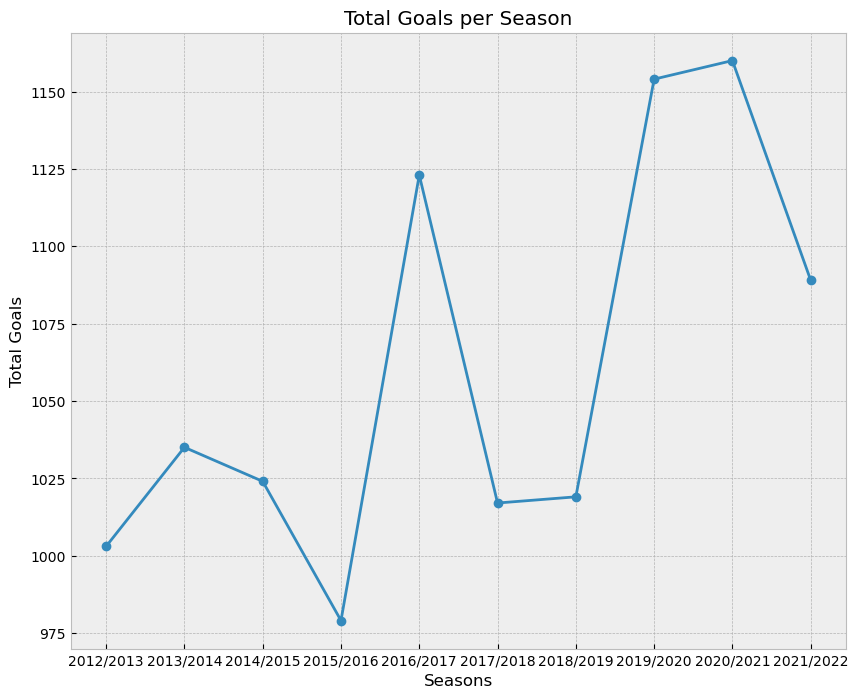

In [96]:
plt.figure(figsize=(10,8))

plt.plot(df['season'].unique(), df.groupby('season')['FTHG'].sum()+df.groupby('season')['FTAG'].sum(), marker = 'o')

plt.style.use('bmh')
plt.title('Total Goals per Season')
plt.xlabel('Seasons')
plt.ylabel('Total Goals')

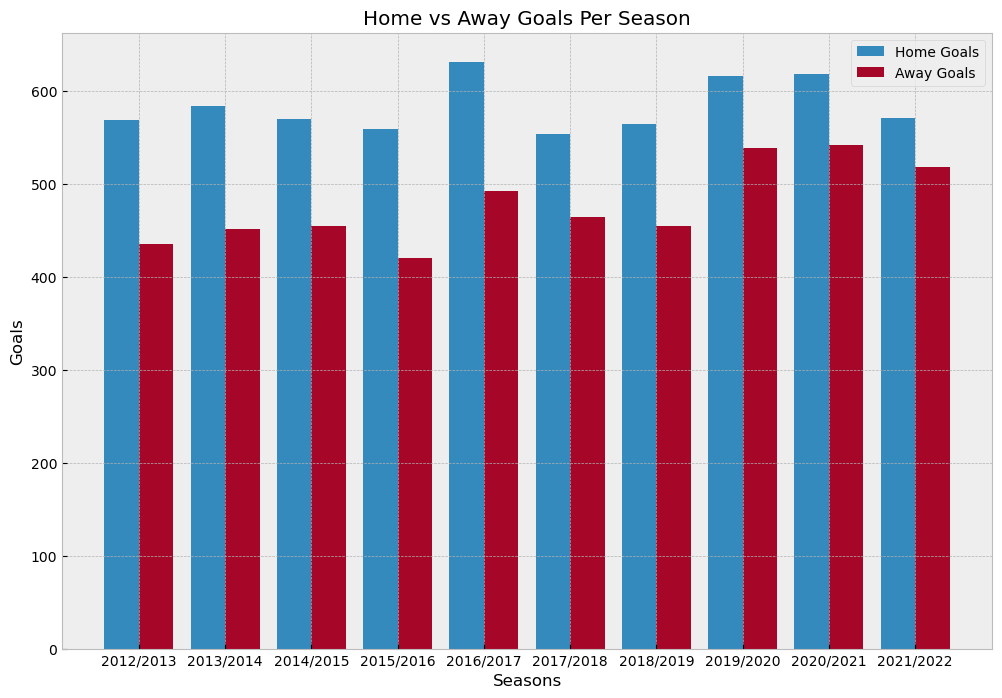

In [97]:
plt.figure(figsize=(12,8))

X_label = df['season'].unique()
X_axis = np.arange(len(df['season'].unique()))

plt.bar(X_axis - 0.2, df.groupby('season')['FTHG'].sum(),0.4, label = 'Home Goals')
plt.bar(X_axis + 0.2, df.groupby('season')['FTAG'].sum(),0.4, label = 'Away Goals')

plt.style.use('bmh')
plt.xticks(X_axis, X_label)
plt.title('Home vs Away Goals Per Season')
plt.xlabel('Seasons')
plt.ylabel('Goals')

plt.legend()

We can see that the total number of goals that the teams achieve at home turf , is every season higher than the
total number of goals the teams achieve at away turf.

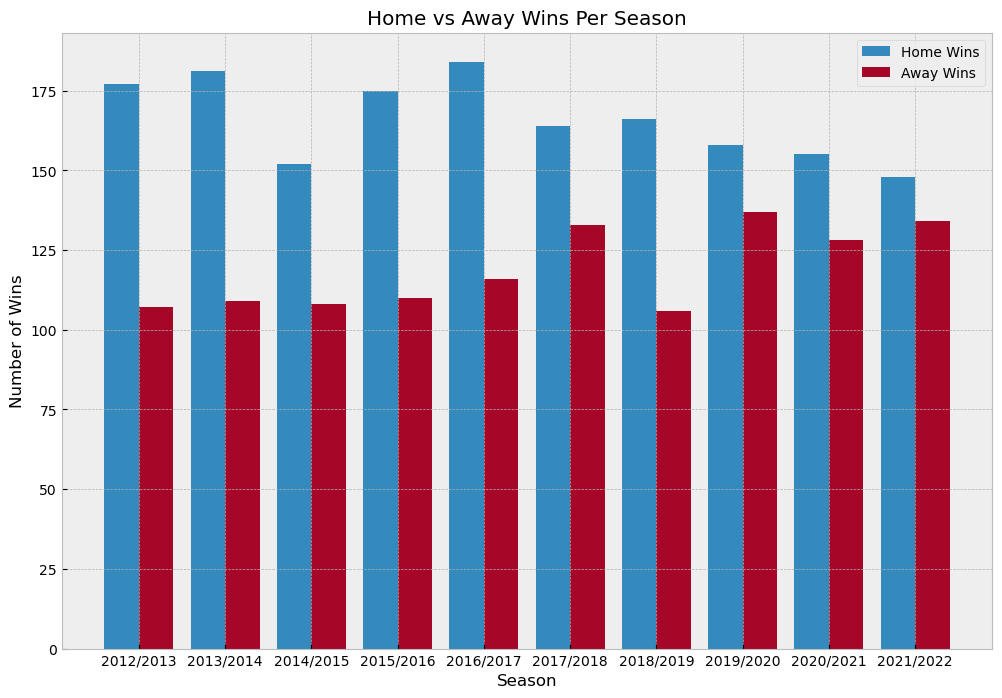

In [98]:
plt.figure(figsize=(12,8))

X_label = df['season'].unique()
X_axis = np.arange(len(df['season'].unique()))

plt.bar(X_axis - 0.2, df.groupby('season')['Result'].apply(lambda x: (x == 1).sum()),0.4, label = 'Home Wins')
plt.bar(X_axis + 0.2, df.groupby('season')['Result'].apply(lambda x: (x == 2).sum()),0.4, label = 'Away Wins')

plt.style.use('bmh')
plt.xticks(X_axis, X_label)
plt.title('Home vs Away Wins Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')

plt.legend()

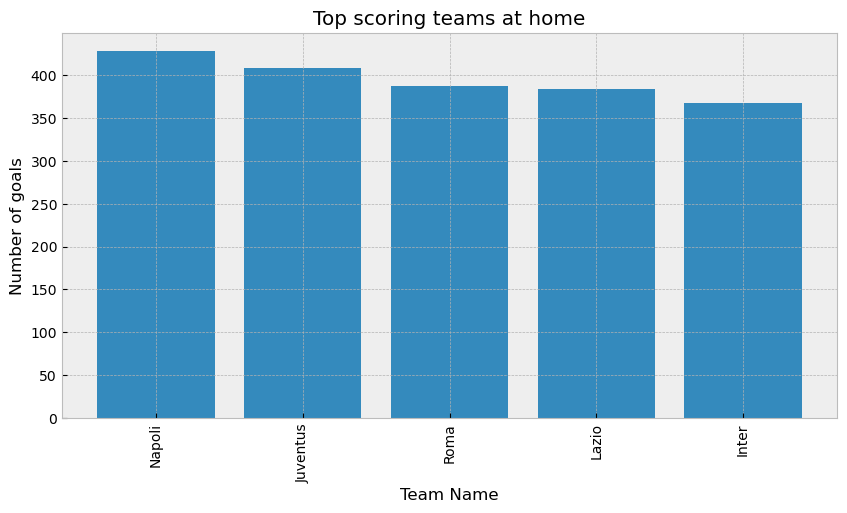

In [99]:
X_label = df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label, rotation = 'vertical')
plt.xlabel('Team Name')
plt.ylabel('Number of goals')
plt.title('Top scoring teams at home')

plt.show()

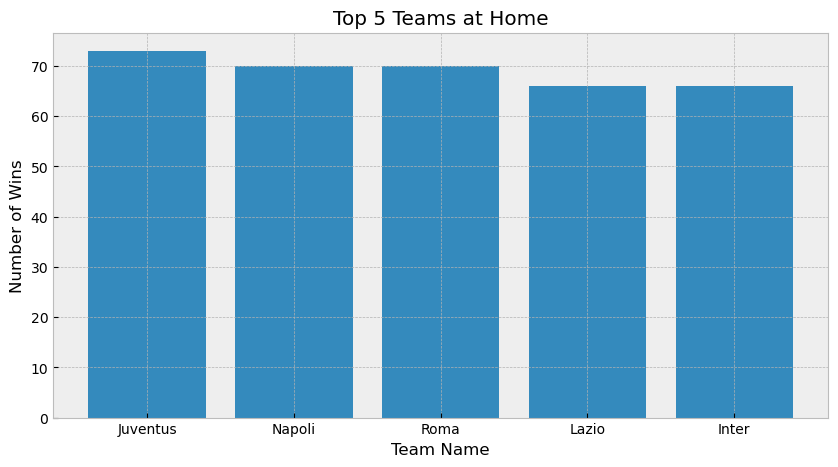

In [100]:
X_label = df.groupby('HomeTeam')['Result'].apply(lambda x: (x == 1).sum()).sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('HomeTeam')['Result'].apply(lambda x: (x == 2).sum()).sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label)
plt.title('Top 5 Teams at Home')
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')

plt.show()

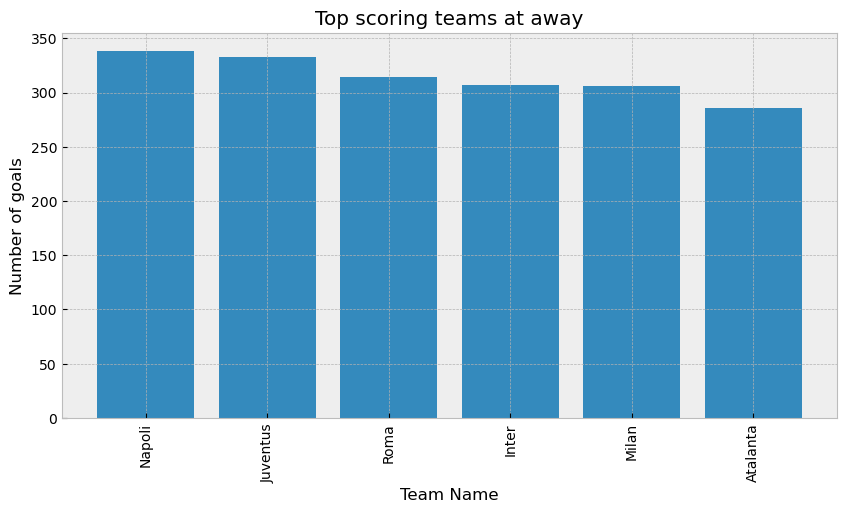

In [101]:
X_label = df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False).head(6).index

plt.figure(figsize=(10,5))

plt.bar(range(6),df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False).head(6))

plt.style.use('bmh')
plt.xticks(np.arange(6),X_label, rotation = 'vertical')
plt.xlabel('Team Name')
plt.ylabel('Number of goals')
plt.title('Top scoring teams at away')

plt.show()

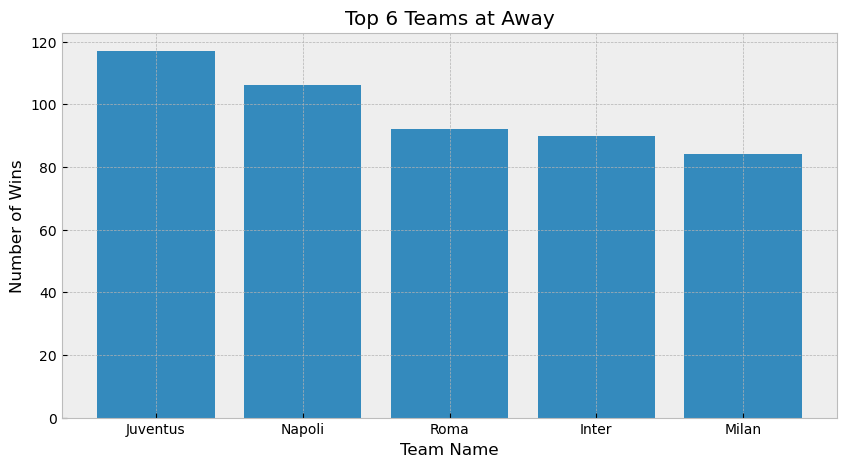

In [102]:
X_label = df.groupby('AwayTeam')['Result'].apply(lambda x: (x == 2).sum()).sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('AwayTeam')['Result'].apply(lambda x: (x == 2).sum()).sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label)
plt.title('Top 6 Teams at Away')
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')

plt.show()

We are going to check if the team with the best attack actually wins the Bundesliga

In [103]:
team_home_scored = df.groupby(['season','HomeTeam'])['FTHG'].sum()
team_home_scored = team_home_scored.rename_axis(['Season','Team Name'])

team_away_scored = df.groupby(['season','AwayTeam'])['FTAG'].sum()
team_away_scored = team_away_scored.rename_axis(['Season','Team Name'])


team_goals_scored = team_home_scored + team_away_scored

best_goalscoring_team = team_goals_scored.loc[team_goals_scored.groupby(level=0).idxmax()]

best_goalscoring_team

Season     Team Name
2012/2013  Napoli       73.0
2013/2014  Juventus     80.0
2014/2015  Juventus     72.0
2015/2016  Roma         83.0
2016/2017  Napoli       94.0
2017/2018  Lazio        89.0
2018/2019  Atalanta     77.0
2019/2020  Atalanta     98.0
2020/2021  Atalanta     90.0
2021/2022  Inter        84.0
dtype: float64

Only two times the team who scored the most goals won the championship.

In [104]:
team_home_conceded = df.groupby(['season','HomeTeam'])['FTAG'].sum()
team_home_conceded = team_home_conceded.rename_axis(['Season','Team Name'])

team_away_conceded = df.groupby(['season','AwayTeam'])['FTHG'].sum()
team_away_conceded = team_away_conceded.rename_axis(['Season','Team Name'])

#Number of goals each team conceded per season
team_goal_conceded = team_home_conceded + team_away_conceded

best_team_at_defense = team_goal_conceded.loc[team_goal_conceded.groupby(level=0).idxmin()]
best_team_at_defense

Season     Team Name
2012/2013  Juventus     24.0
2013/2014  Juventus     23.0
2014/2015  Juventus     24.0
2015/2016  Juventus     20.0
2016/2017  Juventus     27.0
2017/2018  Juventus     24.0
2018/2019  Juventus     30.0
2019/2020  Inter        36.0
2020/2021  Inter        35.0
2021/2022  Milan        31.0
dtype: float64

9 out of 10 times the team with the best defense won the championship

In [105]:
overall_stats = team_goals_scored - team_goal_conceded
best_overall_stats = overall_stats.loc[overall_stats.groupby(level=0).idxmax()]
best_overall_stats

Season     Team Name
2012/2013  Juventus     47.0
2013/2014  Juventus     57.0
2014/2015  Juventus     48.0
2015/2016  Juventus     55.0
2016/2017  Napoli       55.0
2017/2018  Juventus     62.0
2018/2019  Juventus     40.0
2019/2020  Atalanta     50.0
2020/2021  Inter        54.0
2021/2022  Inter        52.0
dtype: float64

<AxesSubplot:xlabel='Result', ylabel='count'>

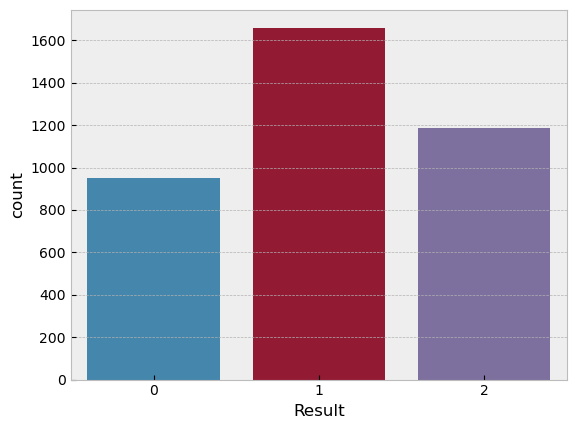

In [106]:
sns.countplot(x='Result', data=df)

We can see that most of the times the home team wins. That probably has to do with the crowd attendance that gives a boost at home teams.

In [107]:
'''
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[['Result']]).toarray())
df = df.join(encoder_df)
'''

"\nfrom sklearn.preprocessing import OneHotEncoder\n\nencoder = OneHotEncoder(handle_unknown = 'ignore')\nencoder_df = pd.DataFrame(encoder.fit_transform(df[['Result']]).toarray())\ndf = df.join(encoder_df)\n"

<AxesSubplot:>

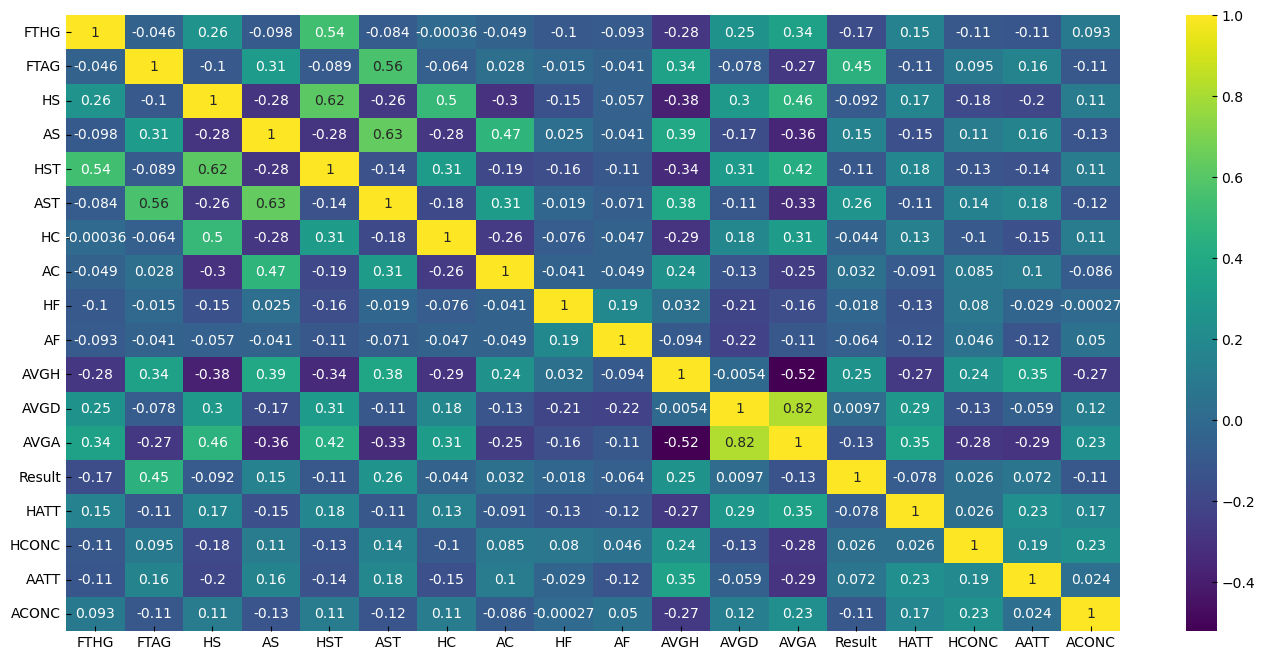

In [108]:
plt.figure(figsize=(17,8))
sns.heatmap(df.drop(['Date', 'HomeTeam', 'AwayTeam', 'Unnamed: 0'],axis=1).corr(),annot=True, cmap='viridis')

<AxesSubplot:xlabel='Result', ylabel='FTAG'>

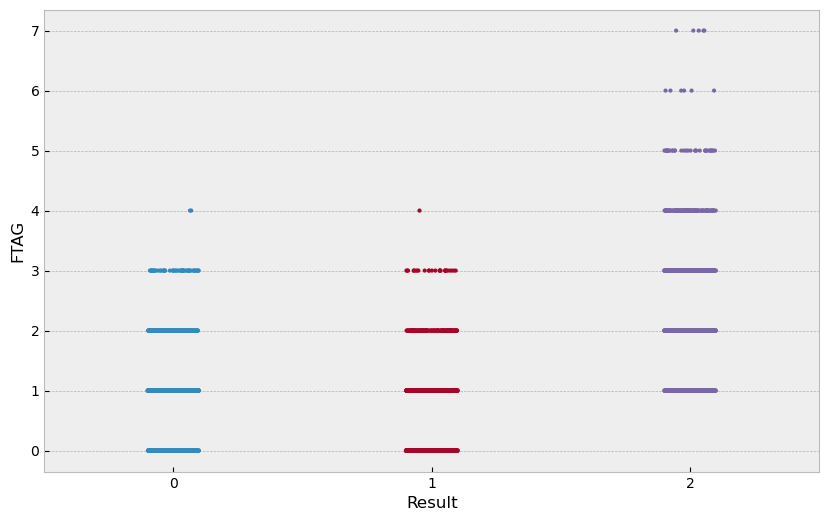

In [109]:
plt.figure(figsize=(10,6))
plt.style.use('bmh')
sns.stripplot(x='Result', y='FTAG', data=df, jitter=True, size=3)

When the away team scores 2 or more goals it is highly possible that it is going to achieve a draw or win the game.

<AxesSubplot:xlabel='Result', ylabel='AVGH'>

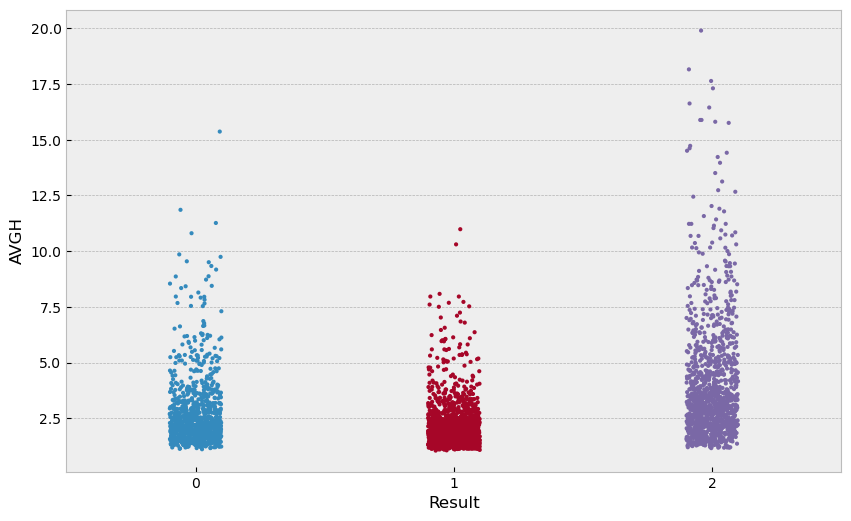

In [110]:
plt.figure(figsize=(10,6))
plt.style.use('bmh')
sns.stripplot(x='Result', y='AVGH', data=df, jitter=True, size=3)

When the home win odds are low it is highly possible that the home team is going to win the game or at least achieve a draw. As the odds are increasing we see that the away team has higher chances of getting the win. It is something that we have anticipated.

<AxesSubplot:xlabel='Result', ylabel='AVGA'>

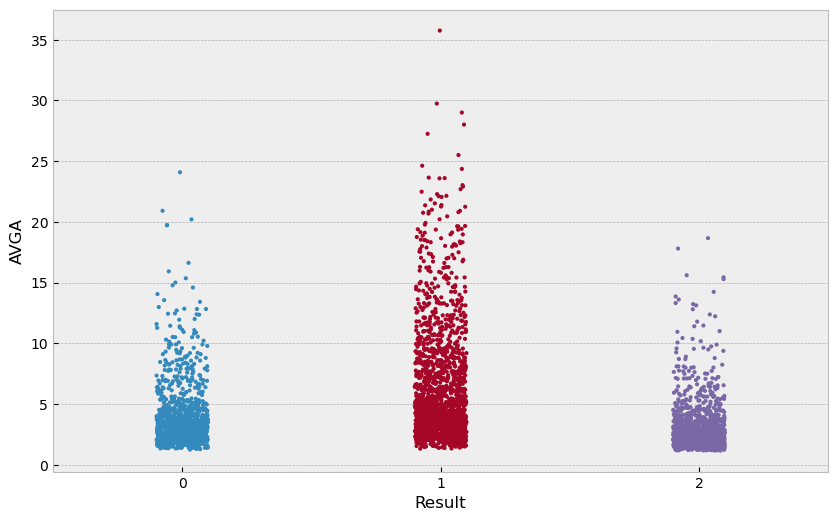

In [111]:
plt.figure(figsize=(10,6))
plt.style.use('bmh')
sns.stripplot(x='Result', y='AVGA', data=df, jitter=True, size=3)

Text(0, 0.5, 'Home Team Goals')

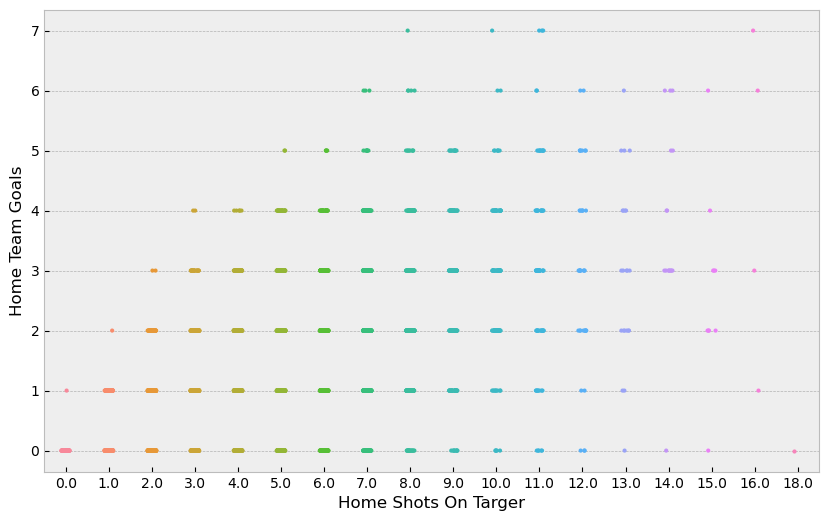

In [112]:
plt.figure(figsize=(10,6))
sns.stripplot(x='HST', y='FTHG', data=df, jitter=True, size=3)

plt.xlabel('Home Shots On Targer')
plt.ylabel('Home Team Goals')

Text(0, 0.5, 'Home Team Goals')

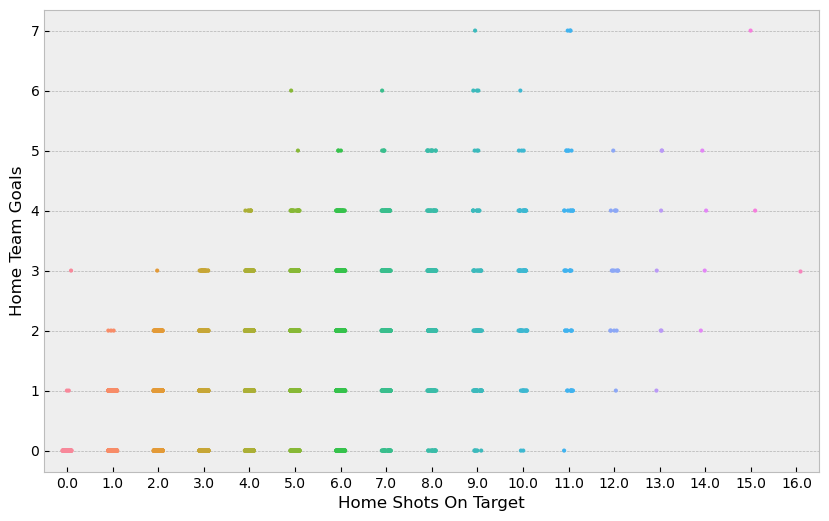

In [113]:
plt.figure(figsize=(10,6))
sns.stripplot(x='AST', y='FTAG', data=df, jitter=True, size=3)

plt.xlabel('Home Shots On Target')
plt.ylabel('Home Team Goals')

We can see that as the number of shots on target for every team is high, it is more possible to score a goal which is the main factor that affect the game result. Maybe a feature like the average of shots on target from match to match would be a good choice.

Text(0, 0.5, 'Average Away Win Odds')

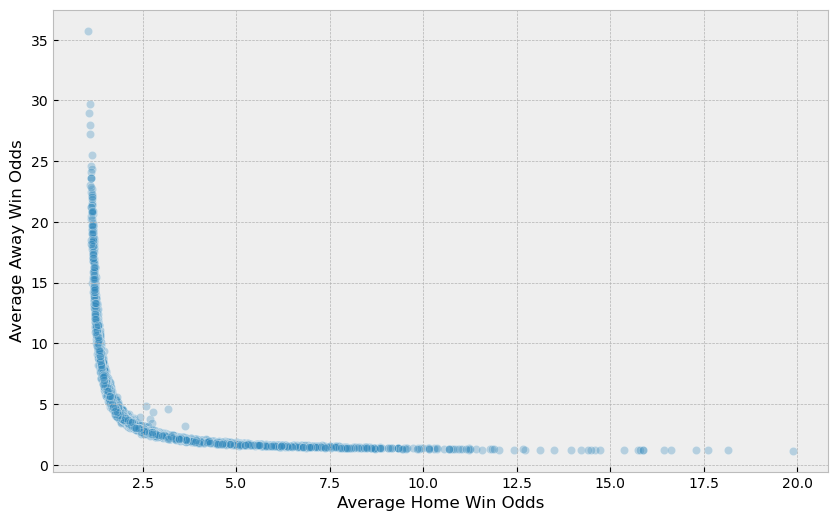

In [114]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AVGH', y='AVGA', data=df, alpha=0.3)

plt.xlabel('Average Home Win Odds')
plt.ylabel('Average Away Win Odds')

Text(0, 0.5, 'Average Draw Odds')

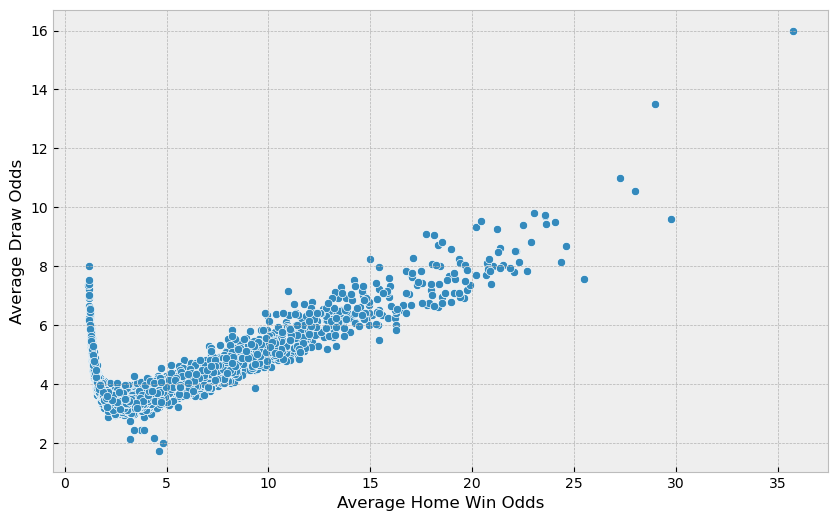

In [115]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AVGA', y='AVGD', data=df)

plt.xlabel('Average Home Win Odds')
plt.ylabel('Average Draw Odds')

As the price of the home win odd is getting lower the price of the away win odd is getting higher and vice versa. That has to do with the favorite to win the game.
When it comes to draw odd it is reasonable to take higher values as the differention of home and and away win odds is getting higher.

Text(0, 0.5, 'Average Home Win Odds')

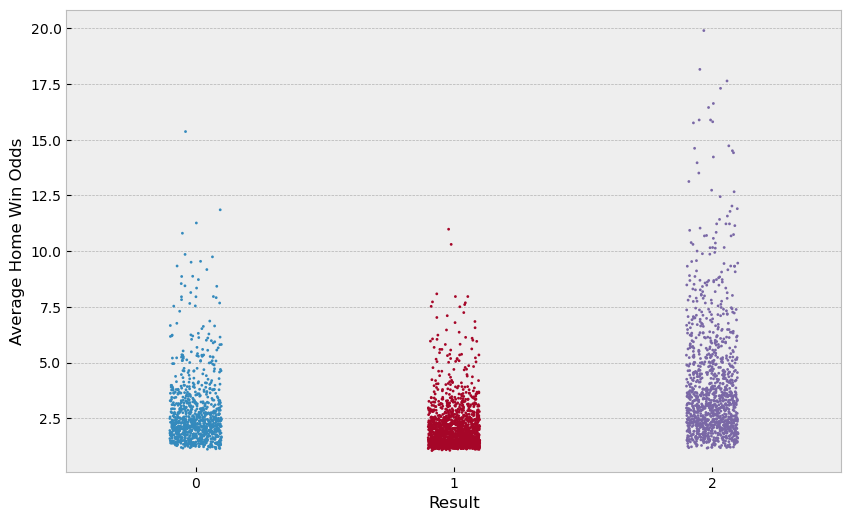

In [116]:
plt.figure(figsize=(10,6))
sns.stripplot(x='Result', y='AVGH', data=df, jitter=True,size=2)

plt.xlabel('Result')
plt.ylabel('Average Home Win Odds')

When the average home win odd is low we can see that it is highly possible that the result is going to be "Home Win". That has to do with the home advantage of the team, but we should not take into consideration only that when we want to predict a football match score.


Text(0, 0.5, 'Average Home Win Odds')

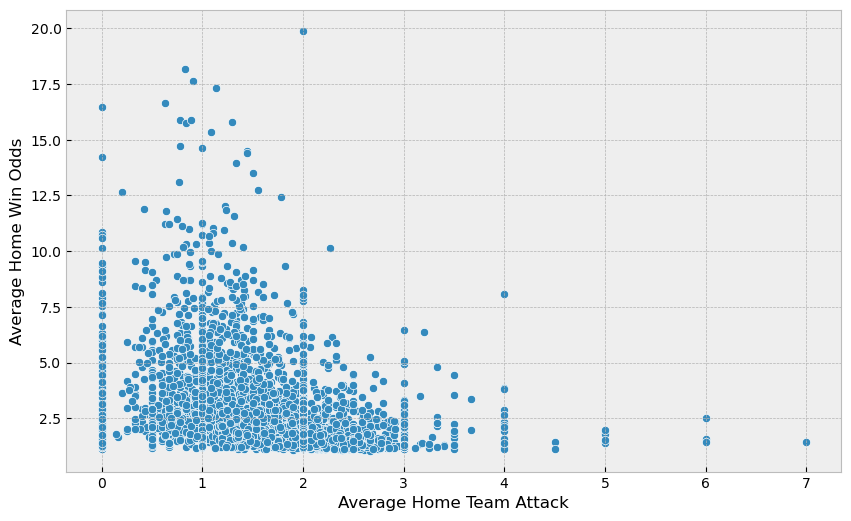

In [117]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='HATT', y='AVGH', data=df)

plt.xlabel('Average Home Team Attack')
plt.ylabel('Average Home Win Odds')

Text(0, 0.5, 'Average Away Win Odds')

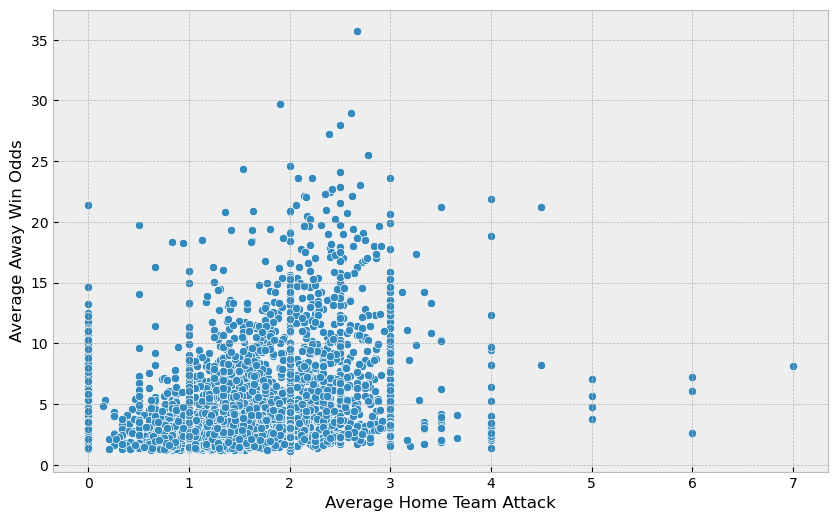

In [118]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='HATT', y='AVGA', data=df)

plt.xlabel('Average Home Team Attack')
plt.ylabel('Average Away Win Odds')

In [119]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='HATT', y='HomeTeamPoints', data=df)

plt.xlabel('Average Home Team Attack')
plt.ylabel('Home Team Points')

ValueError: Could not interpret value `HomeTeamPoints` for parameter `y`

<Figure size 1000x600 with 0 Axes>

When a team has good average team attack we can see that the home win betting odd takes lower value and the away win betting odd takes higher value.
When it comes to the point of the "Home Team" when the home team has goot attack it is reasonable that it is going to have more points. That means that it is getting more wins.

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AATT', y='AVGH', data=df)

plt.xlabel('Average Away Team Attack')
plt.ylabel('Average Home Win Odds')

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AATT', y='AVGA', data=df)

plt.xlabel('Average Away Team Attack')
plt.ylabel('Average Away Win Odds')

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AATT', y='AwayTeamPoints', data=df)

plt.xlabel('Average Away Team Attack')
plt.ylabel('Away Team Points')

The average away team attack has the same behavior as the home team attack when it comes to the odds and the points of each team.